# Esercizio
Generiamo 1000 sample x1, x2 partizionando lo spazio in due classi sqcondo una determinata funzione e costruiamo un classimicatore tramite una rete neurale

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from keras.layers import Input, Dense
from keras.models import Model

In [11]:
N=3000

func= lambda x1,x2 : np.sin(x1*20)>x2**2 - x1
x1=np.random.rand(N)
x2=np.random.rand(N)
y=func(x1,x2)

X=np.stack((x1,x2),axis=1)

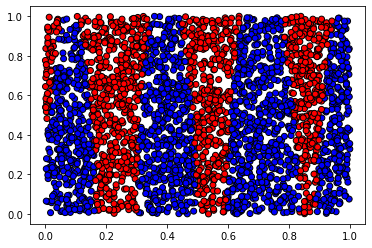

In [13]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')

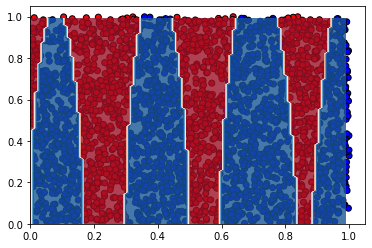

In [15]:
xx1, xx2 = np.meshgrid(np.arange(0, 1, 0.01),np.arange(0, 1, 0.01))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
plt.contourf(xx1, xx2, (func(xx1,xx2)).reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)

In [17]:
inputs=Input(shape=(2))
hidden=Dense(30,activation="sigmoid")(inputs)
outputs=Dense(1,activation="sigmoid")(hidden)
model= Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy", optimizer="adam")

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 30)                90        
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [19]:
history=model.fit(X,y,validation_split=0.5,epochs=1000,verbose=2)

Epoch 1/1000
47/47 - 1s - loss: 0.8077 - val_loss: 0.7310 - 1s/epoch - 27ms/step
Epoch 2/1000
47/47 - 0s - loss: 0.7045 - val_loss: 0.6880 - 320ms/epoch - 7ms/step
Epoch 3/1000
47/47 - 0s - loss: 0.6838 - val_loss: 0.6816 - 357ms/epoch - 8ms/step
Epoch 4/1000
47/47 - 1s - loss: 0.6812 - val_loss: 0.6797 - 741ms/epoch - 16ms/step
Epoch 5/1000
47/47 - 0s - loss: 0.6794 - val_loss: 0.6784 - 481ms/epoch - 10ms/step
Epoch 6/1000
47/47 - 1s - loss: 0.6779 - val_loss: 0.6771 - 565ms/epoch - 12ms/step
Epoch 7/1000
47/47 - 1s - loss: 0.6758 - val_loss: 0.6762 - 891ms/epoch - 19ms/step
Epoch 8/1000
47/47 - 0s - loss: 0.6747 - val_loss: 0.6748 - 456ms/epoch - 10ms/step
Epoch 9/1000
47/47 - 1s - loss: 0.6723 - val_loss: 0.6734 - 520ms/epoch - 11ms/step
Epoch 10/1000
47/47 - 0s - loss: 0.6710 - val_loss: 0.6723 - 403ms/epoch - 9ms/step
Epoch 11/1000
47/47 - 0s - loss: 0.6693 - val_loss: 0.6712 - 387ms/epoch - 8ms/step
Epoch 12/1000
47/47 - 0s - loss: 0.6675 - val_loss: 0.6702 - 288ms/epoch - 6ms/st

In [20]:
plt.plot(...)
plt.plot(...)
plt.show()

dict_keys(['loss', 'val_loss'])
[0.8077243566513062, 0.7045450210571289, 0.683807373046875, 0.6811806559562683, 0.6794058680534363, 0.6779097318649292, 0.675828218460083, 0.6746916770935059, 0.6723359823226929, 0.6710419654846191, 0.6693443059921265, 0.6675068736076355, 0.6661195158958435, 0.6643708348274231, 0.6630735397338867, 0.6617500185966492, 0.660175085067749, 0.6583422422409058, 0.6569511294364929, 0.6554986238479614, 0.6542454957962036, 0.6532068252563477, 0.6516948938369751, 0.650502622127533, 0.6488382816314697, 0.6478815674781799, 0.6464821100234985, 0.6452614665031433, 0.6441321969032288, 0.6433536410331726, 0.6429306864738464, 0.641345202922821, 0.6409232020378113, 0.6396073698997498, 0.6387110352516174, 0.6382100582122803, 0.6372480392456055, 0.6369966268539429, 0.6360783576965332, 0.6355421543121338, 0.6358480453491211, 0.6346369981765747, 0.6342039108276367, 0.6340600848197937, 0.633341908454895, 0.6333186626434326, 0.6329755187034607, 0.6327877640724182, 0.63256585597

In [1]:
# Max likelihood estimator

In [1]:
import numpy as np


In [16]:
N=100000
counter=0
for epochs in range(N):
    v=np.random.rand()
    delta=np.random.rand()
    answer=np.random.uniform(v-delta,v+delta,size=4)
    answer=np.append(answer,v)
    np.random.shuffle(answer)
    max_arr=[]
    for idx,value in enumerate(answer):
        other=np.delete(answer,idx)
        max_arr.append(np.maximum(np.max(other)-value,value-np.min(other)))
    mle= answer[np.argmin(max_arr)]
    if np.isclose(mle,v):
        counter+=1
prob=counter/N
print(prob)


0.50225


In [12]:
np.maximum(np.max(answer)-2.3,2.3-np.min(answer))

1.9266140502899398

In [10]:
np.max(answer)-2.3

-1.601505817227265

0
1
2
3
4
